In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### step 1. open PCA

In [6]:
pca = PCA(n_components=2)

### step 2. train

In [7]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step 3. predict

In [8]:
X = pca.transform(x)

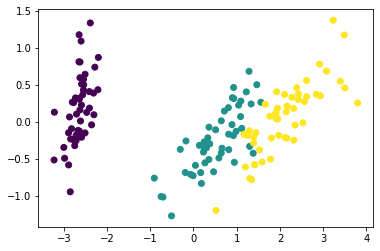

In [11]:
plt.scatter(X[:,0],X[:,1],c=y);

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [14]:
###open svc
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma='auto')

In [17]:
###training
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_predict = clf.predict(x_test)

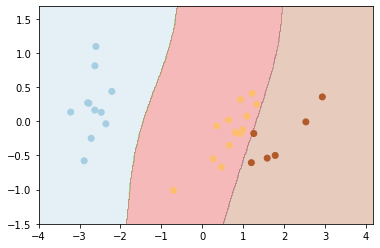

In [21]:
x0 = np.arange(-4,4.2,0.02)
y0 = np.arange(-1.5,1.7,0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm,ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='Paired')

### K-means 自動分類

In [23]:
x = np.random.rand(100,2)

In [24]:
from sklearn.cluster import KMeans

In [25]:
clf = KMeans(n_clusters=3)

In [26]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
clf.predict(x)

array([2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0])

In [28]:
clf.labels_

array([2, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0])

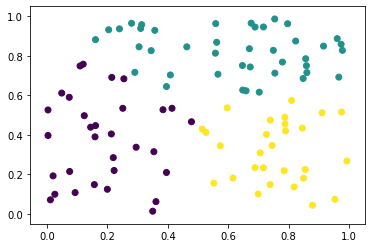

In [29]:
plt.scatter(x[:,0],x[:,1], c=clf.labels_)

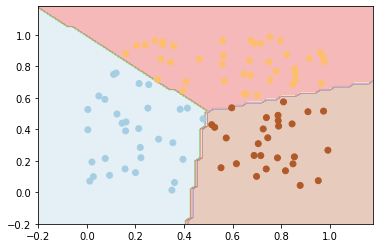

In [31]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap = 'Paired')

### 'make_blols' 生成似真實數據

In [32]:
from sklearn.datasets.samples_generator import make_blobs

In [33]:
x, y = make_blobs(n_samples=500, centers=3,
                 n_features=2,
                 random_state=0)

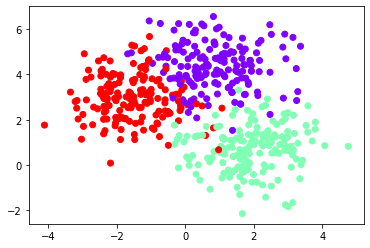

In [35]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='rainbow');

In [36]:
###open mechine
clf = KMeans(n_clusters=3)

In [37]:
###training
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

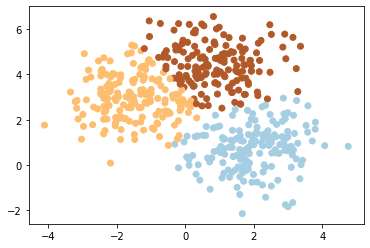

In [38]:
###predict
plt.scatter(x[:,0], x[:,1], c=clf.labels_, cmap='Paired')

### Mean-shift

In [39]:
from sklearn.cluster import MeanShift

In [40]:
clf = MeanShift()

In [41]:
clf.fit(x)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

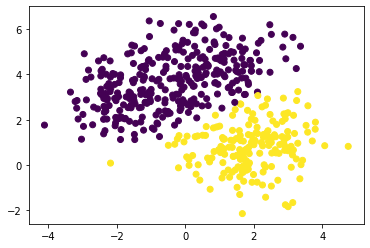

In [42]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

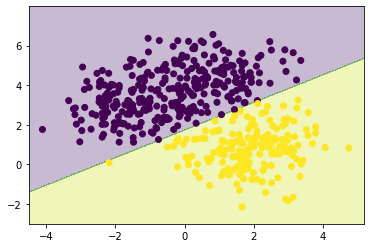

In [47]:
x0 = np.arange(-4.5, 5.2, 0.02)
y0 = np.arange(-3,8,0.02)

xm, ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
from sklearn.svm import SVC

In [50]:
clf = SVC(gamma='auto')

In [51]:
scores = cross_val_score(clf, x, y, cv=5)

In [52]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])